# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [8]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
data = pd.read_csv('creditcard.csv')


In [56]:
X = data.drop(columns=['Class']) 
y = data['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is  0.9990402958697612
Precision is  0.78125
Recall is  0.6493506493506493
F1 is  0.7092198581560283


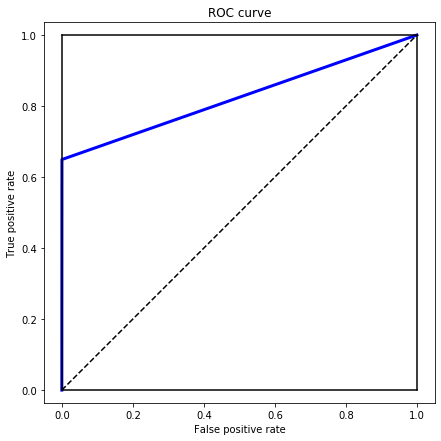

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)


y_pred_proba_log_reg = log_reg.predict_proba(X_test)


def accuracy(y_real, y_pred):
    return (y_pred==y_real).sum()/len(y_real)
print("Accuracy is ", accuracy(y_test,y_pred_log_reg))
def precision(y_real, y_pred):
    return np.mean(y_real[y_pred==1])
print("Precision is ", precision(y_test,y_pred_log_reg))
def recall(y_real, y_pred):
    return np.mean(y_pred[y_real==1])
print("Recall is ", recall(y_test,y_pred_log_reg))
def f1(y_real, y_pred):
    return 2*(precision(y_real, y_pred))*(recall(y_real, y_pred))/((precision(y_real, y_pred))+(recall(y_real, y_pred)))
print("F1 is ",f1(y_test,y_pred_log_reg))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_log_reg)

from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

For Const
Accuracy is  0.9981976288285758
Precision is  nan
Recall is  0.0
F1 is  nan
For KNN
Accuracy is  0.9982444436641972
Precision is  1.0
Recall is  0.025974025974025976
F1 is  0.05063291139240507


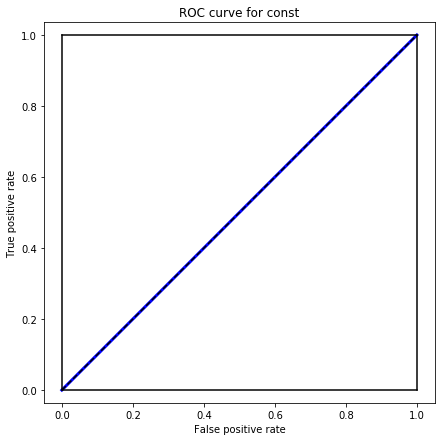

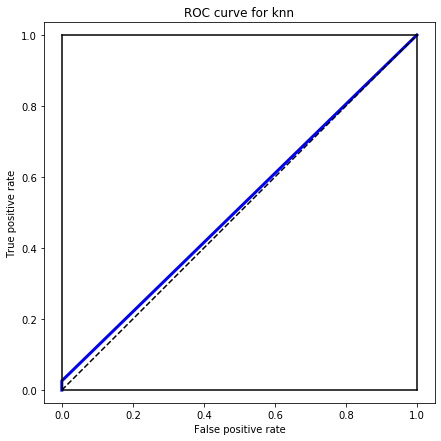

In [41]:
#const
#тк мошеннических транзакций во много раз меньше, то примем все за неошенничиские транзакции
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const
print("For Const")
print("Accuracy is ", accuracy(y_test,y_pred_const))

print("Precision is ", precision(y_test,y_pred_const))

print("Recall is ", recall(y_test,y_pred_const))

print("F1 is ",f1(y_test,y_pred_const))

roc_auc_score(y_test, y_pred_const)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

print("For KNN")
print("Accuracy is ", accuracy(y_test,y_pred_knn))

print("Precision is ", precision(y_test,y_pred_knn))

print("Recall is ", recall(y_test,y_pred_knn))

print("F1 is ",f1(y_test,y_pred_knn))

roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_const)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve for const')
plt.show()

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve for knn')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

0.6493506493506493


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8116883116883117


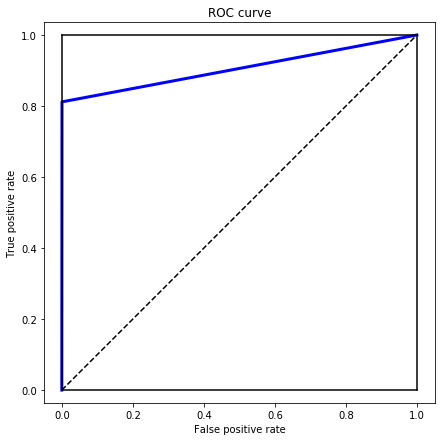

In [42]:
#лучше всего растить recall, тк нам выгоднее забанить всех мошенников, не оставляя ни одного, несмотря на то что можем забанить немошенников.
def recall(y_real, y_pred):
    return np.mean(y_pred[y_real==1])
print(recall(y_test, y_pred_log_reg))

log_reg_w = LogisticRegression(class_weight = {0: 1, 1: 10})
log_reg_w.fit(X_train, y_train)
y_pred_w = log_reg_w.predict(X_test)
y_pred_proba_w = log_reg_w.predict_proba(X_test)[:, 1]

print(recall(y_test, y_pred_w))

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_w)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [69]:
X[np.where(np.isnan(X))] = 0.0
X = data.drop(columns=['Class']) 
y = data['Class']




X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression() 
model.fit(X1_train, y1_train)

y1_pred_log_reg = model.predict(X1_test)

y1_pred_proba_log_reg = model.predict_proba(X1_test)

log_reg_w1 = LogisticRegression(class_weight = {0: 1, 1: 10})
log_reg_w1.fit(X1_train, y1_train)
y_pred_w1 = log_reg_w1.predict(X1_test)
y_pred_proba_w1 = log_reg_w1.predict_proba(X1_test)[:, 1]

print(recall(y_test1, y_pred_w1))
      
      
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_w1)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [13]:
datas = pd.read_csv('train.csv')
datas

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [15]:
pd.options.display.max_rows = 20
Xs = datas.drop(columns=['Category','Descript','Resolution']) 
ys = datas['Category']
keyy=0
kk=0
for y in ys:
    if(y!=keyy):
        keyy=y
        ys.replace([y],[kk], inplace=True)
        kk=kk+1
    elif(y==keyy and kk==0):
        ys.replace([y],[0], inplace=True)
    else:
        ys.replace([y],[kk-1], inplace=True)
Xs['DayOfWeek'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[1,2,3,4,5,6,7], inplace=True)           
Xs['PdDistrict'].replace(['BAYVIEW','CENTRAL','INGLESIDE','MISSION','NORTHERN','PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN'],[1,2,3,4,5,6,7,8,9,10], inplace=True)
'''
Xs=Xs.sort_values(['Address'], ascending=[True]).head()

k=0
key=0
for x in Xs['Address']:
    if(x!=key):
        key=x
        Xs['Address'].replace([x],[k], inplace=True)
        k=k+1
    elif(x==key and k==0):
        Xs['Address'].replace([x],[0], inplace=True)
    else:
        Xs['Address'].replace([x],[k-1], inplace=True)

from datetime import datetime
Xs.index = pd.DatetimeIndex(Xs['Dates'])
Xs['Time']= Xs.index.astype(np.int64)// 10**9
Xs=Xs.drop(columns=['Dates']) 
'''


KeyboardInterrupt: 

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3)

#LogisticRegression
from sklearn.linear_model import LogisticRegression
log_regs = LogisticRegression() 
log_regs.fit(Xs_train, ys_train)

y_pred_log_regs = log_regs.predict(Xs_test)
print(y_pred_log_regs)

y_pred_proba_log_regs = log_regs.predict_proba(Xs_test)
print(y_pred_proba_log_regs)

#const

y_pred_consts = np.ones(len(Xs_test)) 
y_pred_proba_consts = y_pred_consts
print(y_pred_proba_consts)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knns = KNeighborsClassifier(n_neighbors=6) 
knns.fit(Xs_train, ys_train)
y_pred_knns = knns.predict(X_test)
y_pred_proba_knns = knns.predict_proba(X_test)[:, 1]
y_pred_proba_knns[:10]

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?